<a href="https://colab.research.google.com/github/smarvar/Machine-Learnig-practice/blob/master/TP3/TP3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ejercicio 3.3 Dataset Spotify**

In [61]:
# Cargamos las librerias basicas requeridas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [62]:
#leemos el dataset
attributes_spotify = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBOM/data/attributes_spotify.csv")
attributes_spotify.head(10)

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
5,5,0.00479,0.804,251333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,4.0,0.264,1,Sneakin’,Drake
6,6,0.01450,0.739,241400,0.472,0.000007,1,0.2070,-11.204,1,0.1560,80.030,4.0,0.308,1,Childs Play,Drake
7,7,0.02020,0.266,349667,0.348,0.664000,10,0.1600,-11.609,0,0.0371,144.154,4.0,0.393,1,Gyöngyhajú lány,Omega
8,8,0.04810,0.603,202853,0.944,0.000000,11,0.3420,-3.626,0,0.3470,130.035,4.0,0.398,1,I've Seen Footage,Death Grips
9,9,0.00208,0.836,226840,0.603,0.000000,7,0.5710,-7.792,1,0.2370,99.994,4.0,0.386,1,Digital Animal,Honey Claws


In [63]:
#Observamos los parametros estadisticos de cada atributo
attributes_spotify.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


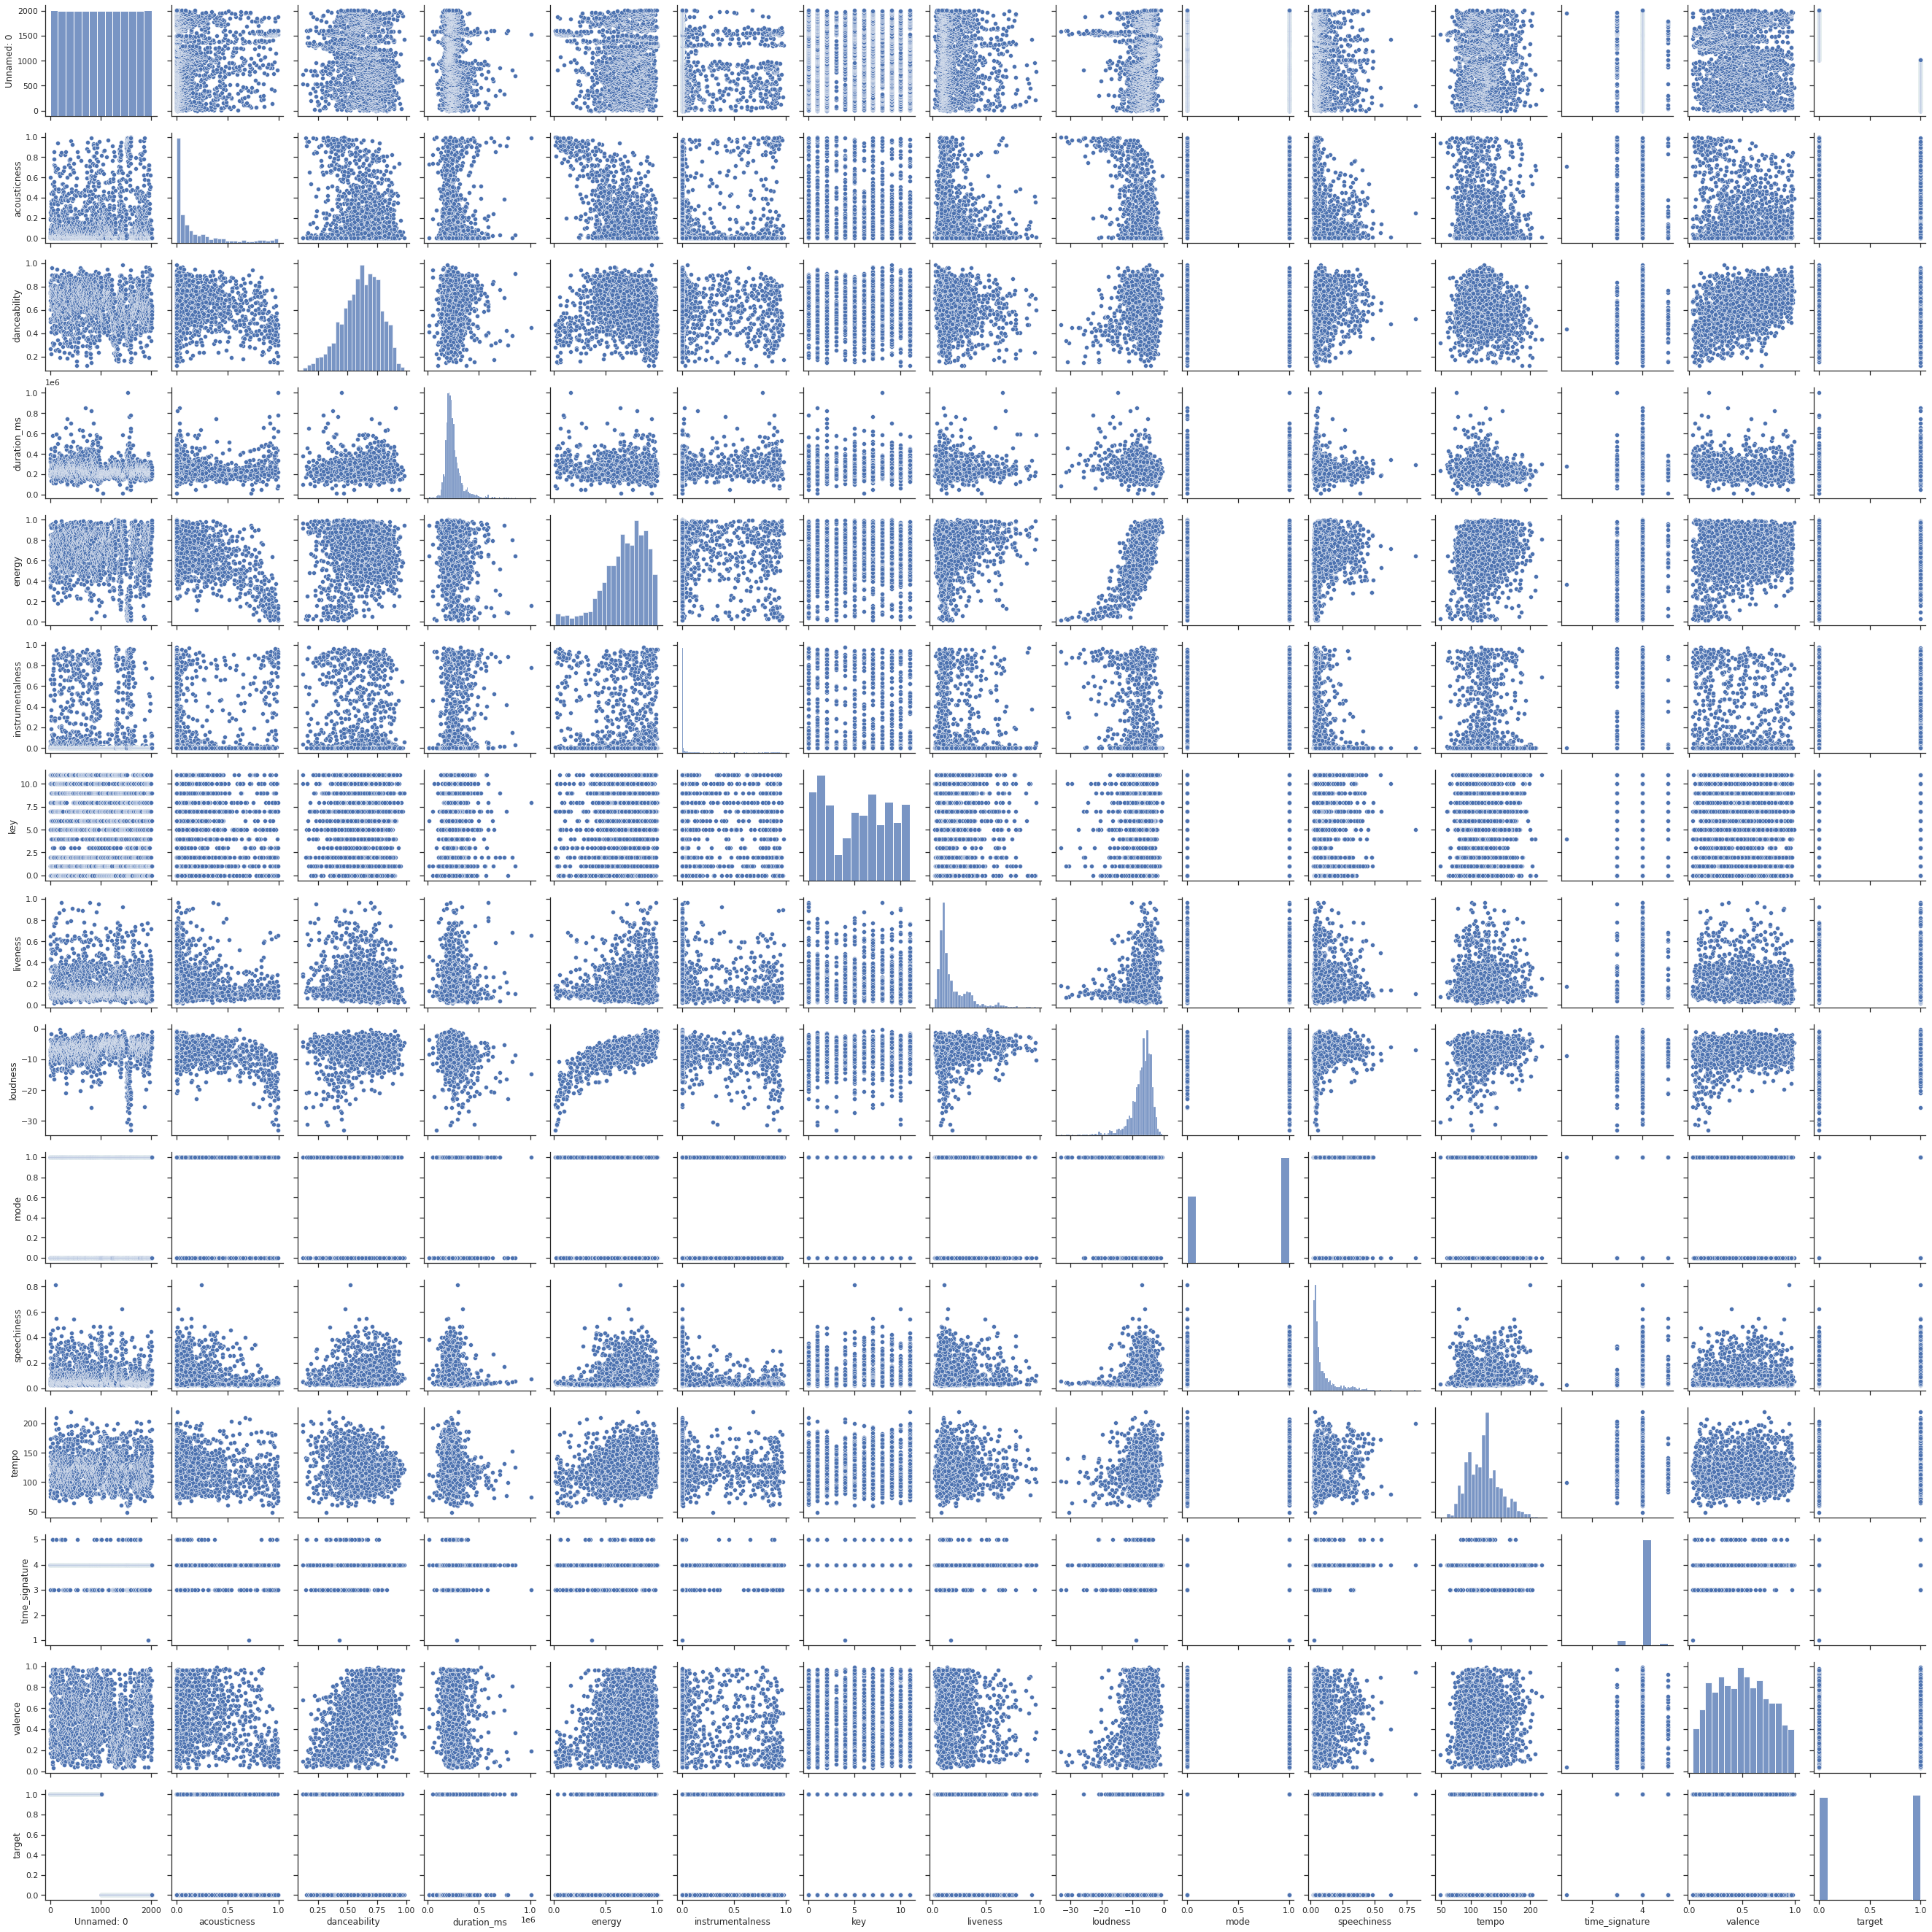

In [65]:
sns.set(style='ticks')
sns.pairplot(attributes_spotify.iloc[:,:])

Luego de ver el Dataset se puede Observar que seria conveniente hacer una normalización de los datos. La mayoria de los datos estan en un rango de de 0 -1, pero atributos como tempo, loudness, key, umnamed y time_signature estan en ragos mucho mayores. De igual manera los atributos song_title y artist son coategoricos, por lo que se debe ver si se llevan a un atributo numerico o se descartan del entrenamiento.  

**Resultados sin Normalizar los atributos**

In [69]:
attributes_spotify_2 = attributes_spotify.drop(['song_title', 'artist'], axis=1) # se descartan los atributos categoricos
X = attributes_spotify_2.iloc[:,:-1] 
y = attributes_spotify_2.iloc[:, -1]
np.random.seed(seed = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [70]:
# Definimos los parametros a testear por parte de Gridsearch, con el fin de encontrar los mas optimos, definiendo un valor de partida de k = sqrt(2017)
k =  int(2017** 0.5) # k = sqrt(N_data)
print('k = ', k)
k_vecinos = np.arange(1, k*2, 2) # Defino un arreglo de K_vecinos iniciado desde 1 en incrementos de 2 hasta 2 veces k

knn = KNeighborsClassifier()
parameters = {'n_neighbors':k_vecinos, 'p':[1, 2]} # Parametros a encontrar
clf = GridSearchCV(knn, parameters, cv =10) # Se define un Cross_validation = 10
clf_Grid = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) # Se predicen los resultados con los valores de test en el modelo entrenado

k =  44


In [71]:
print('K_vecinos evaluados: ', k_vecinos)
print('Mejor k:',clf_Grid.best_estimator_.get_params()['n_neighbors'])
print('Mejor p:', clf_Grid.best_estimator_.get_params()['p'])

K_vecinos evaluados:  [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47
 49 51 53 55 57 59 61 63 65 67 69 71 73 75 77 79 81 83 85 87]
Mejor k: 1
Mejor p: 1


Aunque el valor teorico de k fue 44, Gridsearch encontro como mejor parametro k = 1, esto puede deberse en gran medida a que los datos no estan en una escala similar, por lo cual un valor alto de k_vecinos puede generar mayor error en el modelo.

In [72]:
# Evaluamos los parametros de calidad del modelo con base en los mejores parametros encontrados en Gridsearch
from sklearn import metrics
y_pred = clf_Grid.predict(X_test)
print("Classification report for classifier {}\n{}\n".format(clf_Grid, metrics.classification_report(y_test, y_pred)))

Classification report for classifier GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87]),
                         'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       490
           1       0.89      0.86   

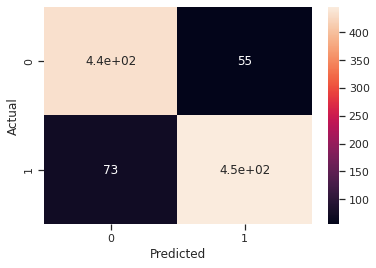

In [73]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

A pesar de que los parametros fueron los menores posibles (k=1 y p=1), el clasificador logro un buen desempeño dando parametros de calidad del modelo por encima de 0.86. 

**Resultados Normailizando los atributos**

In [74]:
# Normalización del dataset sin tener en cuenta los atributos song_title y artist
scaler = StandardScaler()
scaler.fit(X)
Xs = scaler.transform(X)
np.random.seed(seed = 42)
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.5, random_state=42)

In [75]:
# Definimos los parametros a testear por parte de Gridsearch, con el fin de encontrar los mas optimos, definiendo un valor de partida de k = sqrt(2017)
parameters = {'n_neighbors':k_vecinos, 'p':[1, 2]} # Parametros a encontrar
clf = GridSearchCV(knn, parameters, cv =10) # Se define un Cross_validation = 10
clf_Grid = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) # Predig

In [76]:
print('K_vecinos evaluados: ', k_vecinos)
print('Mejor k:',clf_Grid.best_estimator_.get_params()['n_neighbors'])
print('Mejor p:', clf_Grid.best_estimator_.get_params()['p'])

K_vecinos evaluados:  [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47
 49 51 53 55 57 59 61 63 65 67 69 71 73 75 77 79 81 83 85 87]
Mejor k: 47
Mejor p: 1


Para este caso en el que los datos se normalizaron, GridSearch encontro un valor mas cercano al teorico encontrado, siendo k = 47. lo cual indica que la normalización permitio una mejor homogeanización de los atributos.

In [77]:
# Evaluamos los parametros de calidad del modelo con base en los mejores parametros encontrados en Gridsearch
from sklearn import metrics
y_pred = clf_Grid.predict(X_test)
print("Classification report for classifier {}\n{}\n".format(clf_Grid, metrics.classification_report(y_test, y_pred)))

Classification report for classifier GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87]),
                         'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       490
           1       0.99      0.89   

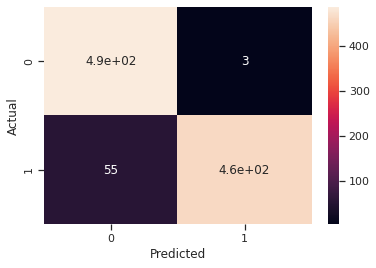

In [78]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

Los resultados con Normalización de los datos muestran un mejor desempeño del modelo. incrementando la precision y recall del modelo en por lo menos un 3%. lo cual se ve traducido en un menor numero de FP y FN, tal y como se puede observar en la matriz de consfusión.